# Imports

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# Load Data

- Load Train
- Load Test
- Combine Train and Test

In [142]:
train = pd.read_csv('../../data/original_data/train.csv')
test = pd.read_csv('../../data/original_data/test.csv')

len_train = len(train)
len_test = len(test)

train.shape, test.shape

((8693, 14), (4277, 13))

In [143]:
df = pd.concat([train, test])

## Confirm Concatenated Shape

In [144]:
df.shape[0] == test.shape[0] + train.shape[0]

True

In [145]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Feature Engineering

In [146]:
df['PassengerGroup'] = df['PassengerId'].apply(lambda x: x.split('_')[0])

group_size = df.groupby('PassengerGroup').size().reset_index(name='GroupSize')
df = df.merge(group_size, on='PassengerGroup')

df['Solo'] = df['GroupSize'].apply(lambda x: 1 if x == 1 else 0)

df['LastName'] = df['Name'].apply(lambda x: x.split(' ')[1] if not pd.isna(x) else np.nan)

# Null Values

## HomePlanet

- Check for passengers in same PassengerGroup
- Check for passengers with same surname
- Use mode to imput

In [147]:
display(f'The number of missing HomePlanet Values before is: {df['HomePlanet'].isna().sum()}')

df['HomePlanet'] = df.groupby('PassengerGroup')['HomePlanet'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

display(f'The number of missing HomePlanet Values after is: {df['HomePlanet'].isna().sum()}')

'The number of missing HomePlanet Values before is: 288'

/tmp/ipykernel_3434/3920154015.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HomePlanet'] = df.groupby('PassengerGroup')['HomePlanet'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


'The number of missing HomePlanet Values after is: 157'

In [148]:
def impute_home_planet(row, df):
    if pd.isna(row['HomePlanet']):
        last_name = row['LastName']
        same_last_name = df[(df['LastName'] == last_name) & (df['HomePlanet'].notna())]
        if not same_last_name.empty:
            return same_last_name['HomePlanet'].values[0]
    return row['HomePlanet']



df['HomePlanet'] = df.apply(lambda row: impute_home_planet(row, df), axis=1)

display(f'The number of missing HomePlanet Values after is: {df['HomePlanet'].isna().sum()}')

'The number of missing HomePlanet Values after is: 13'

In [149]:
df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
display(f'The number of missing HomePlanet Values after is: {df['HomePlanet'].isna().sum()}')

'The number of missing HomePlanet Values after is: 0'

## Destination

- Check for passengers in same PassengerGroup
- Check for passengers with same surname
- Use mode to imput

In [150]:
display(f'The number of missing Destination Values before is: {df['Destination'].isna().sum()}')

df['Destination'] = df.groupby('PassengerGroup')['Destination'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

display(f'The number of missing Destination Values after is: {df['Destination'].isna().sum()}')

'The number of missing Destination Values before is: 274'

/tmp/ipykernel_3434/305662106.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Destination'] = df.groupby('PassengerGroup')['Destination'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


'The number of missing Destination Values after is: 154'

In [151]:
def impute_destination(row, df):
    if pd.isna(row['Destination']):
        last_name = row['LastName']
        same_last_name = df[(df['LastName'] == last_name) & (df['Destination'].notna())]
        if not same_last_name.empty:
            return same_last_name['Destination'].values[0]
    return row['Destination']



df['Destination'] = df.apply(lambda row: impute_destination(row, df), axis=1)

display(f'The number of missing Destination Values after is: {df['Destination'].isna().sum()}')

'The number of missing Destination Values after is: 6'

In [152]:
df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])
display(f'The number of missing Destination Values after is: {df['Destination'].isna().sum()}')

'The number of missing Destination Values after is: 0'

## VIP

In [153]:
df['TotalSpend'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [154]:
df_vip = df[df['VIP'] == True]
df_no_vip = df[df['VIP'] == False]

df_vip.shape, df_no_vip.shape

((273, 19), (12401, 19))

In [155]:
f'The mean amount of money spent by VIPs was: {df_vip['TotalSpend'].mean()}'

'The mean amount of money spent by VIPs was: 4595.542124542125'

In [156]:
vip_null_mask = df['VIP'].isna()

df.loc[vip_null_mask, 'VIP'] = df.loc[vip_null_mask, 'TotalSpend'] >= 4000

## Cabin

- This can be split into three (Deck, Num, Side)

In [157]:
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)

df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,PassengerGroup,GroupSize,Solo,LastName,TotalSpend,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,False,0001,1,1,Ofracculy,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,True,0002,1,1,Vines,736.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,False,0003,2,0,Susent,10383.0,A,0,S


### Deck

In [158]:
display(f'The number of missing Deck Values before is: {df['Deck'].isna().sum()}')

df['Deck'] = df.groupby('PassengerGroup')['Deck'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

display(f'The number of missing Deck Values after is: {df['Deck'].isna().sum()}')

def impute_deck(row, df):
    if pd.isna(row['Deck']):
        last_name = row['LastName']
        same_last_name = df[(df['LastName'] == last_name) & (df['Deck'].notna())]
        if not same_last_name.empty:
            return same_last_name['Deck'].values[0]
    return row['Deck']



df['Deck'] = df.apply(lambda row: impute_deck(row, df), axis=1)

missing_decks_after_first_imputation = df['Deck'].isna().sum()
display(f'The number of missing Deck values after first imputation is: {missing_decks_after_first_imputation}')

if missing_decks_after_first_imputation > 0:
    mode_deck = df['Deck'].mode()[0]
    df['Deck'].fillna(mode_deck, inplace=True)

missing_decks_after_mode_imputation = df['Deck'].isna().sum()
display(f'The number of missing Deck values after imputing with mode is: {missing_decks_after_mode_imputation}')

'The number of missing Deck Values before is: 299'

/tmp/ipykernel_3434/530661642.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Deck'] = df.groupby('PassengerGroup')['Deck'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


'The number of missing Deck Values after is: 162'

'The number of missing Deck values after first imputation is: 5'

/tmp/ipykernel_3434/530661642.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Deck'].fillna(mode_deck, inplace=True)


'The number of missing Deck values after imputing with mode is: 0'

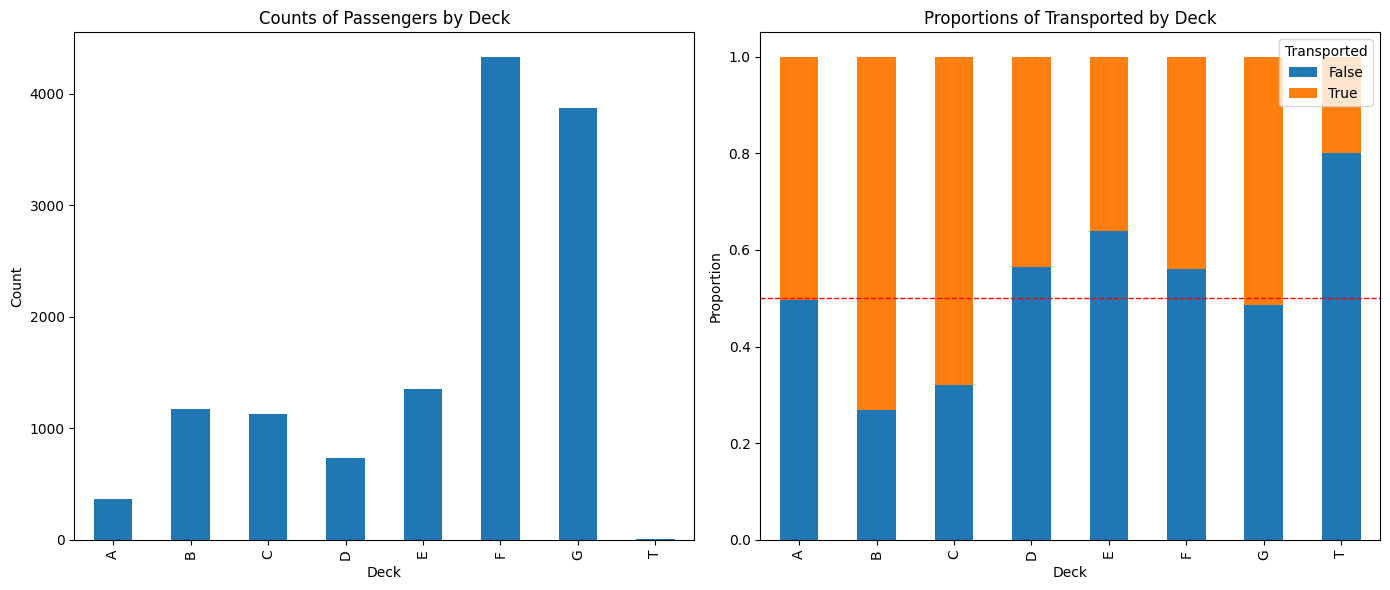

In [159]:
deck_transport = df.groupby(['Deck', 'Transported']).size().unstack(fill_value=0)

deck_transport_norm = deck_transport.div(deck_transport.sum(axis=1), axis=0)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

deck_counts = df['Deck'].value_counts().sort_index()
deck_counts.plot(kind='bar', ax=ax[0])
ax[0].set_title('Counts of Passengers by Deck')
ax[0].set_xlabel('Deck')
ax[0].set_ylabel('Count')

deck_transport_norm.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Proportions of Transported by Deck')
ax[1].set_xlabel('Deck')
ax[1].set_ylabel('Proportion')
ax[1].legend(title='Transported')

ax[1].axhline(0.5, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

**Notes**

Passengers in Cabins B and C have a higher chance of being Transported
Passengers in E and T have less chance of being transported

*Decision*

- Group Cabins by chance of Transported

    - **low** - *E, T*
    - **medium** - *A, D, F, G*
    - **high** - *B, C*


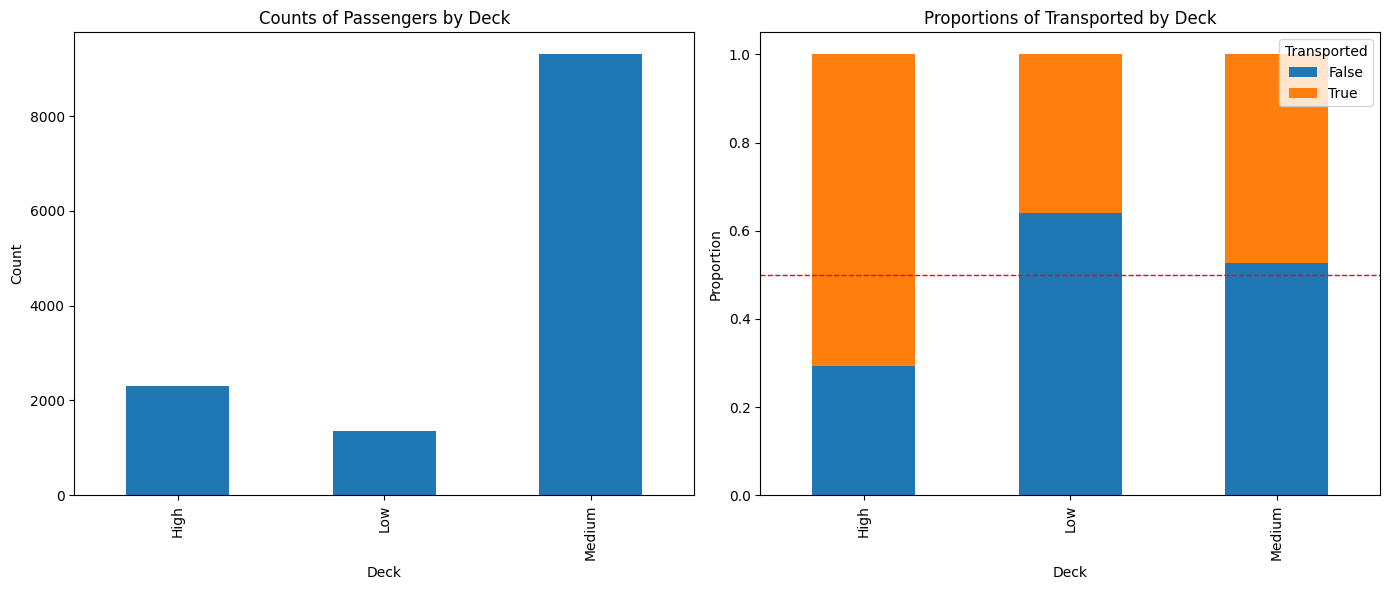

In [160]:
df['Deck'] = df['Deck'].map({'A': 'Medium', 'B': 'High', 'C': 'High', 'D': 'Medium', 'E': 'Low', 'F': 'Medium', 'G': 'Medium', 'T': 'Low'})

deck_transport = df.groupby(['Deck', 'Transported']).size().unstack(fill_value=0)

deck_transport_norm = deck_transport.div(deck_transport.sum(axis=1), axis=0)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

deck_counts = df['Deck'].value_counts().sort_index()
deck_counts.plot(kind='bar', ax=ax[0])
ax[0].set_title('Counts of Passengers by Deck')
ax[0].set_xlabel('Deck')
ax[0].set_ylabel('Count')

deck_transport_norm.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Proportions of Transported by Deck')
ax[1].set_xlabel('Deck')
ax[1].set_ylabel('Proportion')
ax[1].legend(title='Transported')

ax[1].axhline(0.5, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

### Side

In [161]:
display(f'The number of missing Side Values before is: {df['Side'].isna().sum()}')

df['Side'] = df.groupby('PassengerGroup')['Side'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

display(f'The number of missing Side Values after is: {df['Side'].isna().sum()}')

def impute_side(row, df):
    if pd.isna(row['Side']):
        last_name = row['LastName']
        same_last_name = df[(df['LastName'] == last_name) & (df['Side'].notna())]
        if not same_last_name.empty:
            return same_last_name['Side'].values[0]
    return row['Side']

df['Side'] = df.apply(lambda row: impute_side(row, df), axis=1)
missing_sides_after_first_imputation = df['Side'].isna().sum()
display(f'The number of missing Side values after first imputation is: {missing_sides_after_first_imputation}')

if missing_sides_after_first_imputation > 0:
    mode_sides = df['Side'].mode()[0]
    df['Side'].fillna(mode_sides, inplace=True)

missing_sides_after_mode_imputation = df['Side'].isna().sum()
display(f'The number of missing Sides values after imputing with mode is: {missing_sides_after_mode_imputation}')

'The number of missing Side Values before is: 299'

/tmp/ipykernel_3434/923372094.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Side'] = df.groupby('PassengerGroup')['Side'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


'The number of missing Side Values after is: 162'

'The number of missing Side values after first imputation is: 5'

/tmp/ipykernel_3434/923372094.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Side'].fillna(mode_sides, inplace=True)


'The number of missing Sides values after imputing with mode is: 0'

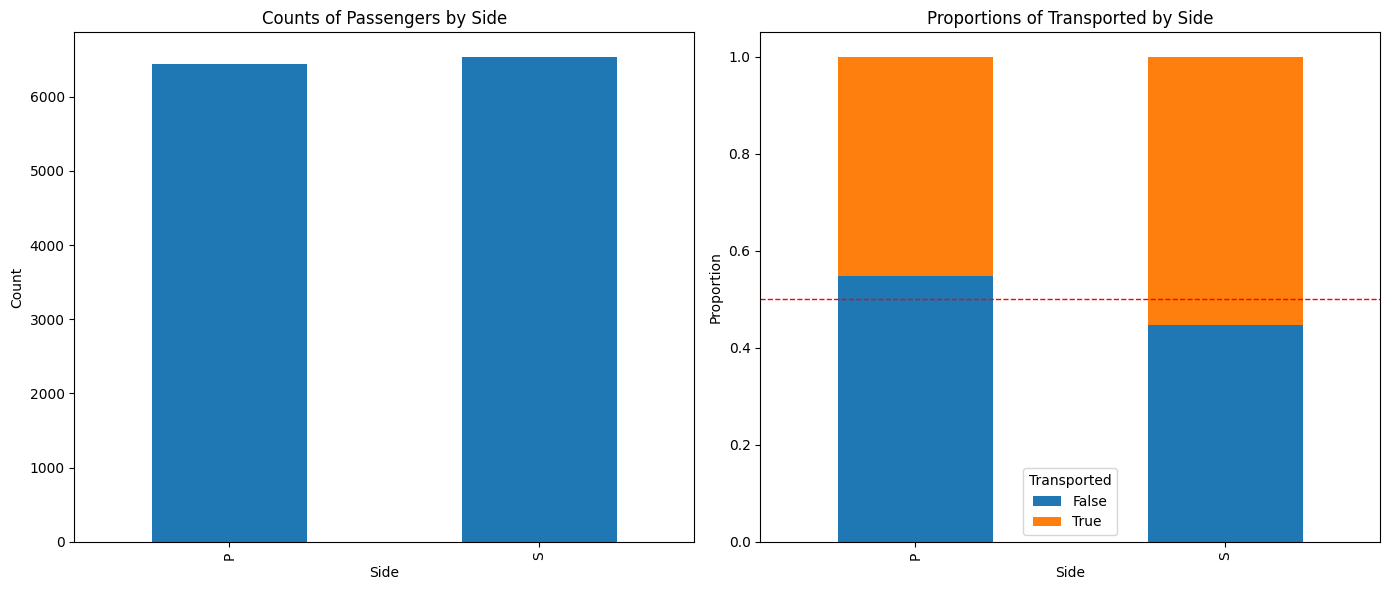

In [162]:
side_transport = df.groupby(['Side', 'Transported']).size().unstack(fill_value=0)

side_transport_norm = side_transport.div(side_transport.sum(axis=1), axis=0)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

side_counts = df['Side'].value_counts().sort_index()
side_counts.plot(kind='bar', ax=ax[0])
ax[0].set_title('Counts of Passengers by Side')
ax[0].set_xlabel('Side')
ax[0].set_ylabel('Count')

side_transport_norm.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Proportions of Transported by Side')
ax[1].set_xlabel('Side')
ax[1].set_ylabel('Proportion')
ax[1].legend(title='Transported')

ax[1].axhline(0.5, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

**Notes**

Passengers on Starboard side have a higher chance of being Transported
Passengers on Port side have less chance of being transported


### Num

In [164]:
print(f'The number of missing Num values before is: {df["Num"].isna().sum()}')

df['Num'] = df.groupby('PassengerGroup')['Num'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

print(f'The number of missing Num values after is: {df["Num"].isna().sum()}')


def impute_num(row, df):
    if pd.isna(row['Num']):
        last_name = row['LastName']
        same_last_name = df[(df['LastName'] == last_name) & (df['Num'].notna())]
        if not same_last_name.empty:
            return same_last_name['Num'].values[0]
    return row['Num']

df['Num'] = df.apply(lambda row: impute_num(row, df), axis=1)

missing_num_after_first_imputation = df['Num'].isna().sum()
print(f'The number of missing Num values after first imputation is: {missing_num_after_first_imputation}')

if missing_num_after_first_imputation > 0:
    mode_num = df['Num'].mode()[0]
    df['Num'].fillna(mode_num, inplace=True)

missing_num_after_mode_imputation = df['Num'].isna().sum()
print(f'The number of missing Num values after imputing with mode is: {missing_num_after_mode_imputation}')
df['Num'] = df['Num'].astype(int)

The number of missing Num values before is: 0
The number of missing Num values after is: 0
The number of missing Num values after first imputation is: 0
The number of missing Num values after imputing with mode is: 0


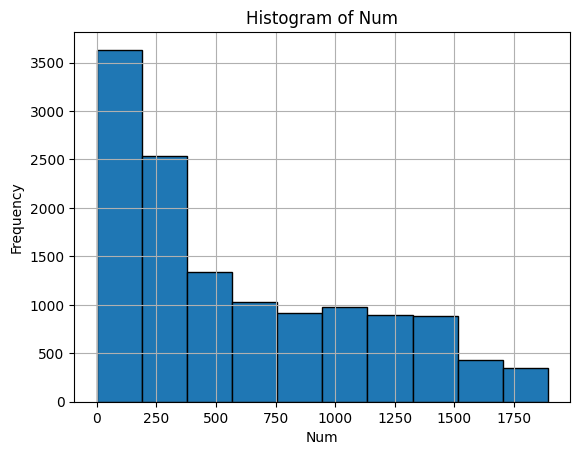

In [165]:
df['Num'].hist(bins=10, edgecolor='black')
plt.title('Histogram of Num')
plt.xlabel('Num')
plt.ylabel('Frequency')
plt.show()

In [138]:
def cabin_deck_categorize(cabin_deck):
    if cabin_deck == 'A':
        return 0
    elif cabin_deck == 'B':
        return 1
    elif cabin_deck == 'C':
        return 2
    elif cabin_deck == 'D':
        return 3
    elif cabin_deck == 'E':
        return 4
    elif cabin_deck == 'F':
        return 5
    elif cabin_deck == 'G':
        return 6
    else:
        return 7
    
df_v7['Cabin_deckGroup'] = df_v7['Cabin_deck'].apply(lambda x: cabin_deck_categorize(x))

'306'